<h2><center> Welcome to the sales analysis</h2></center>
<figure>
<center><img src ="market1.jpg" width = "800" height = '500'/>

Notre objectif dans ce projet d'analyse de donnée est de répondre à des questions business qui nous ont été soumis par l'équipe marketing. Nous analyserons les données mensuelles de ventes d'une société spécialiser dans la vente de smartphone et de gadgets.




1.   **Quel est le mois dans lequel nous avons réalisé le meilleur chiffre d'affaire**
2.   **Dans quelle ville nous avons réalisé un maximum de commande**
3.   **En quel moment doit on faire une camapgne publicitaire pour avoir plus de vente**
4.   **Quels produits se vend le plus**




In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
# %tensorflow_version 1.x
import os
os.chdir('/content/drive/MyDrive/Data analysis/Sales_Data/Sales_Data')

In [ ]:
!ls

All_data.csv		 Sales_January_2019.csv  Sales_November_2019.csv
Sales_April_2019.csv	 Sales_July_2019.csv	 Sales_October_2019.csv
Sales_August_2019.csv	 Sales_June_2019.csv	 Sales_September_2019.csv
Sales_December_2019.csv  Sales_March_2019.csv
Sales_February_2019.csv  Sales_May_2019.csv


In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn

In [ ]:
files =  [file for file in os.listdir(r'/content/drive/MyDrive/Data analysis/Sales_Data/Sales_Data')]

In [ ]:
for file in files:
  print(file)

Sales_November_2019.csv
Sales_May_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_December_2019.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_March_2019.csv
Sales_January_2019.csv
Sales_February_2019.csv


In [ ]:
path = r'/content/drive/MyDrive/Data analysis/Sales_Data/Sales_Data'

all_data =  pd.DataFrame()

for file in files:
  current_data =  pd.read_csv(path +'/'+ file)
  all_data =  pd.concat([all_data,current_data]) 

print(all_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       278797            Wired Headphones                1      11.99   
1       278798        USB-C Charging Cable                2      11.95   
2       278799    Apple Airpods Headphones                1      150.0   
3       278800            27in FHD Monitor                1     149.99   
4       278801  Bose SoundSport Headphones                1      99.99   
...        ...                         ...              ...        ...   
12031   162004    Apple Airpods Headphones                1        150   
12032   162005      AAA Batteries (4-pack)                2       2.99   
12033   162006        USB-C Charging Cable                1      11.95   
12034   162007        USB-C Charging Cable                1      11.95   
12035   162008            27in FHD Monitor                1     149.99   

           Order Date                         Purchase Address  
0      11/21/19 09:54      46 Park St, New Yor

In [ ]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [ ]:
all_data.to_csv( path+'/All_data.csv', index= False)

In [ ]:
all_data =  pd.read_csv('/content/drive/MyDrive/Data analysis/Sales_Data/Sales_Data/All_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [ ]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
#Supprimer les valeurs manquantes
all_data.dropna(how='all',inplace=True)

1.   **Quel est le mois dans lequel nous avons réalisé le meilleur chiffre d'affaire**


In [ ]:
all_data['Order Date']

0         11/21/19 09:54
1         11/17/19 10:03
2         11/19/19 14:56
3         11/25/19 22:24
4         11/09/19 13:56
               ...      
186845    02/12/19 22:02
186846    02/04/19 20:44
186847    02/24/19 06:31
186848    02/24/19 19:09
186849    02/26/19 17:15
Name: Order Date, Length: 186305, dtype: object

In [ ]:
def month(x):
  return x.split('/')[0]



In [ ]:
all_data['Months'] = all_data['Order Date'].apply(month)
all_data['Months']

0         11
1         11
2         11
3         11
4         11
          ..
186845    02
186846    02
186847    02
186848    02
186849    02
Name: Months, Length: 186305, dtype: object

In [ ]:
all_data['Months'].unique()

array(['11', '12', 'Order Date', '05', '06', '10', '09', '07', '08', '01',
       '04', '03', '02'], dtype=object)

In [ ]:
all_data = all_data[all_data['Months'] != 'Order Date']
all_data['Months'].unique()

array(['11', '12', '05', '06', '10', '09', '07', '08', '01', '04', '03',
       '02'], dtype=object)

In [ ]:
all_data['Months']= all_data['Months'].astype(int)

In [ ]:
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(float)


In [ ]:
all_data['Sales'] = all_data['Price Each']* all_data['Quantity Ordered']
all_data.groupby('Months')['Sales'].sum()

Months
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

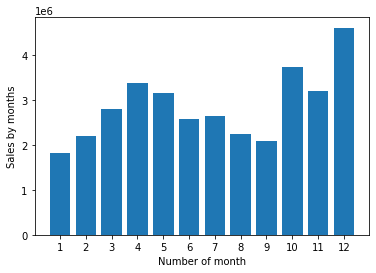

In [ ]:
month = range(1,13)
plt.bar(month,all_data.groupby('Months')['Sales'].sum())
plt.xticks(month)
plt.xlabel('Number of month')
plt.ylabel('Sales by months')
plt.show()

2.   **Dans quelle ville nous avons réalisé un maximum de commande**

In [ ]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,278797,Wired Headphones,1.0,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2.0,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1.0,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1.0,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1.0,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99
...,...,...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1.0,150.00,02/12/19 22:02,"227 Church St, San Francisco, CA 94016",2,150.00
186846,162005,AAA Batteries (4-pack),2.0,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001",2,5.98
186847,162006,USB-C Charging Cable,1.0,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301",2,11.95
186848,162007,USB-C Charging Cable,1.0,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001",2,11.95


In [ ]:
def ville(x):
  return x.split(',')[1]

all_data['Ville'] = all_data['Purchase Address'].apply(ville)
all_data['Ville']

0          New York City
1                 Austin
2            Los Angeles
3                Seattle
4                 Boston
               ...      
186845     San Francisco
186846       Los Angeles
186847           Atlanta
186848            Dallas
186849       Los Angeles
Name: Ville, Length: 185950, dtype: object

In [ ]:
all_data.groupby('Ville')['Ville'].count()

Ville
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: Ville, dtype: int64

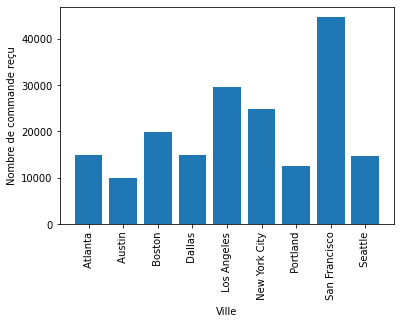

In [ ]:
plt.bar(all_data.groupby('Ville')['Ville'].count().index,all_data.groupby('Ville')['Ville'].count())
plt.xticks(rotation = 'vertical')
plt.xlabel('Ville')
plt.ylabel('Nombre de commande reçu')
plt.show()

 **En quel moment doit on faire une camapgne publicitaire pour avoir plus de vente**

In [ ]:
all_data['Hour'] =  pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Hour']  

0          9
1         10
2         14
3         22
4         13
          ..
186845    22
186846    20
186847     6
186848    19
186849    17
Name: Hour, Length: 185950, dtype: int64

In [ ]:
keys = []
hours = []
for key, hour in all_data.groupby('Hour'):
  keys.append(key)
  hours.append(len(hour))
 

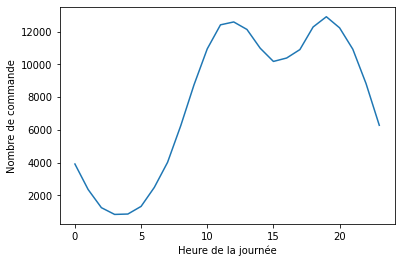

In [ ]:
plt.plot(keys,hours)
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de commande')
plt.show()

**Quels produits se vend le plus**

In [ ]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Ville,Hour
0,278797,Wired Headphones,1.0,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City,9
1,278798,USB-C Charging Cable,2.0,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin,10
2,278799,Apple Airpods Headphones,1.0,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles,14
3,278800,27in FHD Monitor,1.0,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle,22
4,278801,Bose SoundSport Headphones,1.0,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston,13
...,...,...,...,...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1.0,150.00,02/12/19 22:02,"227 Church St, San Francisco, CA 94016",2,150.00,San Francisco,22
186846,162005,AAA Batteries (4-pack),2.0,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001",2,5.98,Los Angeles,20
186847,162006,USB-C Charging Cable,1.0,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301",2,11.95,Atlanta,6
186848,162007,USB-C Charging Cable,1.0,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001",2,11.95,Dallas,19


In [ ]:
all_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

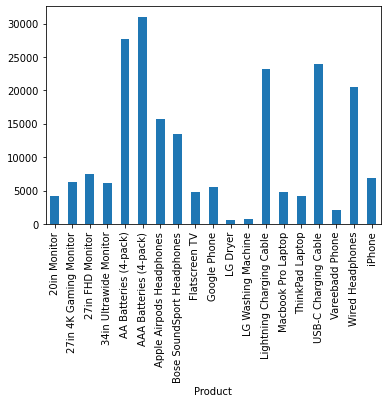

In [ ]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [ ]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [ ]:
produict =  all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity =  all_data.groupby('Product')['Quantity Ordered'].sum()

prices = all_data.groupby('Product')['Price Each'].mean()

<Figure size 2880x1728 with 0 Axes>

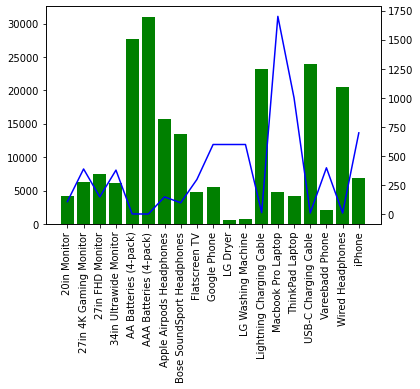

In [ ]:
plt.figure(figsize=(40,24))

fig,ax1 =  plt.subplots()
ax2 = ax1.twinx()
ax1.bar(produict,quantity,color= 'g')
ax2.plot(produict,prices,'b-')
ax1.set_xticklabels(produict,rotation= 'vertical')
plt.show()

4. **Quelles sont les combinaisons de produits qui se vendent le plus**

In [ ]:
 df =all_data[all_data['Order ID'].duplicated(keep=False)]
 df

In [ ]:
df['Grouped']=  df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Ville,Hour,Grouped
9,278806,Bose SoundSport Headphones,1.0,99.99,11/19/19 19:12,"174 2nd St, Boston, MA 02215",11,99.99,Boston,19,"Bose SoundSport Headphones,ThinkPad Laptop"
10,278806,ThinkPad Laptop,1.0,999.99,11/19/19 19:12,"174 2nd St, Boston, MA 02215",11,999.99,Boston,19,"Bose SoundSport Headphones,ThinkPad Laptop"
15,278811,Wired Headphones,1.0,11.99,11/06/19 16:01,"99 Elm St, San Francisco, CA 94016",11,11.99,San Francisco,16,"Wired Headphones,Apple Airpods Headphones"
16,278811,Apple Airpods Headphones,1.0,150.00,11/06/19 16:01,"99 Elm St, San Francisco, CA 94016",11,150.00,San Francisco,16,"Wired Headphones,Apple Airpods Headphones"
24,278819,iPhone,1.0,700.00,11/04/19 06:20,"880 Maple St, New York City, NY 10001",11,700.00,New York City,6,"iPhone,Apple Airpods Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
186799,161960,USB-C Charging Cable,2.0,11.95,02/01/19 11:32,"867 Cherry St, Boston, MA 02215",2,23.90,Boston,11,"Vareebadd Phone,USB-C Charging Cable"
186811,161972,Google Phone,1.0,600.00,02/02/19 21:01,"59 Lincoln St, Austin, TX 73301",2,600.00,Austin,21,"Google Phone,USB-C Charging Cable"
186812,161972,USB-C Charging Cable,1.0,11.95,02/02/19 21:01,"59 Lincoln St, Austin, TX 73301",2,11.95,Austin,21,"Google Phone,USB-C Charging Cable"
186837,161997,Google Phone,1.0,600.00,02/28/19 22:15,"845 8th St, San Francisco, CA 94016",2,600.00,San Francisco,22,"Google Phone,USB-C Charging Cable"


In [ ]:
df['Grouped']

9         Bose SoundSport Headphones,ThinkPad Laptop
10        Bose SoundSport Headphones,ThinkPad Laptop
15         Wired Headphones,Apple Airpods Headphones
16         Wired Headphones,Apple Airpods Headphones
24                   iPhone,Apple Airpods Headphones
                             ...                    
186799          Vareebadd Phone,USB-C Charging Cable
186811             Google Phone,USB-C Charging Cable
186812             Google Phone,USB-C Charging Cable
186837             Google Phone,USB-C Charging Cable
186838             Google Phone,USB-C Charging Cable
Name: Grouped, Length: 14649, dtype: object

In [ ]:
df2 = df.drop_duplicates(subset= ['Order ID'])

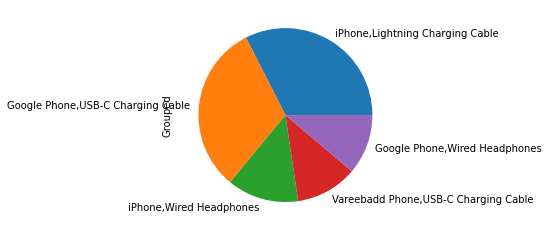

In [ ]:
df2['Grouped'].value_counts()[0:5].plot.pie()

In [ ]:
 all_data.to_csv('My_all_data.csv', index= False)

In [ ]:
df2.to_csv('grouped_data.csv',index=False)